In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
print('The shape of the dataset: {}'.format(df.shape))
print('Size of dataset : {}'.format(df.size))

The shape of the dataset: (303, 14)
Size of dataset : 4242


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df = df.fillna(df.mean())

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
df.corr().transpose()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


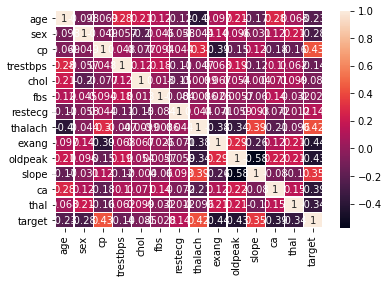

In [10]:
sns.heatmap(df.corr(), annot = True, linewidth = 0.4)

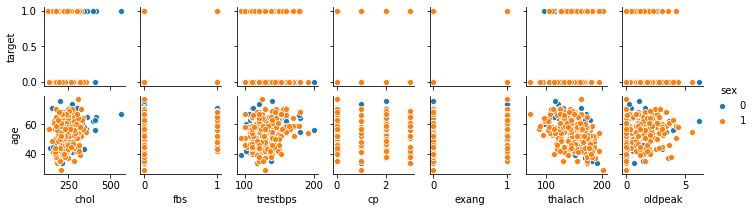

In [11]:
sns.pairplot(df, x_vars = ['chol','fbs','trestbps','cp','exang','thalach','oldpeak'] , y_vars = ['target','age'], hue = 'sex', height = 1.4,kind = 'scatter', diag_kind = 'kde')

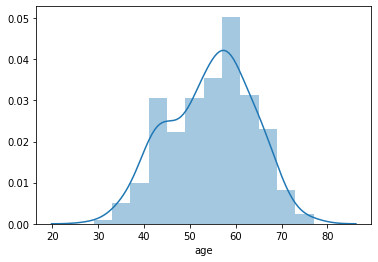

In [12]:
sns.distplot(df['age'])

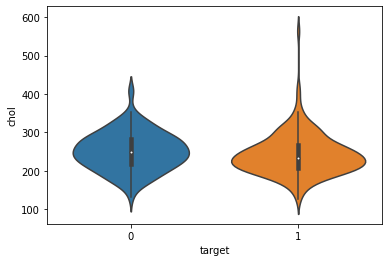

In [13]:
sns.violinplot(data=df, x = 'target', y = 'chol')

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'],axis = 1).copy()
print(X.head())

y = df[['target']].copy()
pd.to_numeric(y['target'])
print(y)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
     target
0         1
1         1
2         1
3         1
4         1
..      ...
298       0
299       0
300       0
301       0
302       0

[303 rows x 1 columns]


In [15]:
tot = len(y.loc[y['target']==1])
act = len(y.loc[y['target']])
print('Heart attack rate: ', (tot/act)*100)
print(y.dtypes)

Heart attack rate:  54.45544554455446
target    int64
dtype: object


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y , test_size = 0.2, random_state = 32, stratify = y)

In [17]:
s1 = Y_train['target'].sum()/len(Y_train)
s2 = Y_test['target'].sum()/len(Y_test)
print(s1)
print(s2)

0.5454545454545454
0.5409836065573771


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)
models = [ ]
names = ['Decisiontree', 'Rnforest', 'LR', 'SVC', 'XGboost']
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(LogisticRegression(random_state=32, solver = 'saga'))
models.append(SVC())
models.append(XGBClassifier(booster='gbtree',  gamma=0.1, learning_rate=0.1, max_depth=3,  n_estimators=1, objective='binary:logistic',reg_lambda=1.0, sample_type='uniform'))

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
for i in range (0,len(models)):
    imp_cv = cross_val_score(models[i], X_train, Y_train, cv = 32, scoring = 'accuracy')
    models[i].fit(X_train, Y_train)
    y_pred = models[i].predict(X_test)
    

C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d 

[15:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { sample_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { sample_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not use

[15:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { sample_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old b


[15:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { sample_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old 

Decisiontree : 0.819672131147541
Rnforest : 0.819672131147541
LR : 0.819672131147541
SVC : 0.819672131147541
XGboost : 0.819672131147541


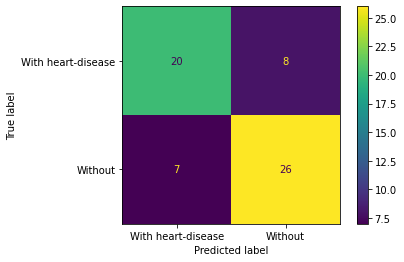

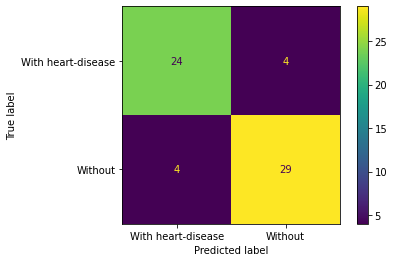

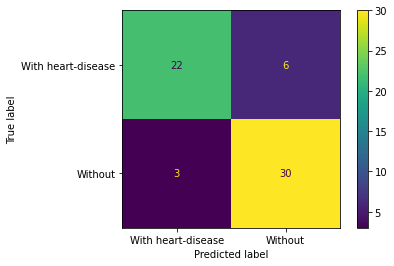

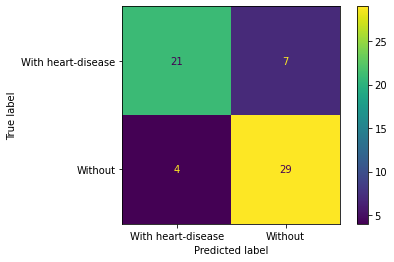

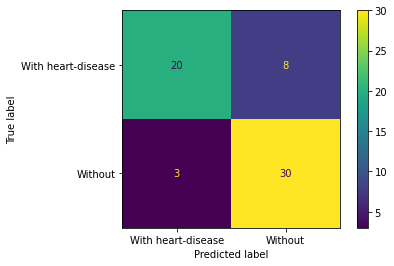

In [20]:
for i in range(0, len(models)):
    score = accuracy_score(Y_test, y_pred)
    print( '{0} : {1}'.format(names[i],score))
    plot_confusion_matrix(models[i],X_test,Y_test, values_format = 'd',display_labels = ["With heart-disease","Without"])
   
    

On considering the accuracy score and the confusion matrix the RandomForest and XGB seems to be an Optimal fit. Let's further analyse the models and visualize the tree

In [21]:
from sklearn.model_selection import GridSearchCV
xgs  = XGBClassifier(booster='gbtree',  n_estimators=1, 
                     objective='binary:logistic')
param_grid =[ {
    'gamma' : [0, 0.01, 0.001, 0.0001111, 0.0111, 0.111, 0.101, 0.201],
    'learning_rate' : [0, 0.01, 0.001, 0.001111, 0.00001, 0.1, 0.1001, 0.112],
    'reg_lambda': [0, 0.25, 0.5, 0.78, 1, 1.2, 1.4, 1.7, 1.8654, 2.25, 5, 10],
} ]

opt_mod = GridSearchCV(xgs,param_grid , scoring = 'accuracy', verbose= 2)
opt_mod.fit(X_train, Y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
[CV] gamma=0, learning_rate=0, reg_lambda=0 ..........................
[15:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ........... gamma=0, learning_rate=0, reg_lambda=0, total=   0.0s
[CV] gamma=0, learning_rate=0, reg_lambda=0 ..........................
[15:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ........... gamma=0, learning_rate=0, reg_lambda=0, total=   0.0s
[CV] gamma=0, learning_rate=0, r

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Vivek\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_


[CV] ......... gamma=0, learning_rate=0, reg_lambda=0.5, total=   0.0s
[CV] gamma=0, learning_rate=0, reg_lambda=0.5 ........................
[15:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ......... gamma=0, learning_rate=0, reg_lambda=0.5, total=   0.0s
[CV] gamma=0, learning_rate=0, reg_lambda=0.78 .......................
[15:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ........ gamma=0, learning_rate=0, reg_lambda=0.78, total=   0.0s
[CV] gamma=0, learning_r

[CV] gamma=0, learning_rate=0, reg_lambda=1.8654 .....................
[15:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ...... gamma=0, learning_rate=0, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0, learning_rate=0, reg_lambda=1.8654 .....................
[15:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ...... gamma=0, learning_rate=0, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0, learning_rate=0, reg_lambda=1.8654 .....................
[15:18:36] WARNING: C:/Us

[15:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0, learning_rate=0.01, reg_lambda=0.5 .....................
[15:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ...... gamma=0, learning_rate=0.01, reg_lambda=0.5, total=   0.0s
[CV] gamma=0, learning_rate=0.01, reg_lambda=0.5 .....................
[15:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ...... gamma=0, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0, learning_rate=0.01, reg_lambda=1.7 .....................
[15:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ...... gamma=0, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0, learning_rate=0.01, reg_lambda=1.7 .....................
[15:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.001, reg_lambda=0.25, total=   0.0s
[CV] gamma=0, learning_rate=0.001, reg_lambda=0.25 ...................
[15:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.001, reg_lambda=0.25, total=   0.0s
[CV] gamma=0, learning_rate=0.001, reg_lambda=0.25 ...................
[15:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0, learning_rate=0.001, reg_lambda=1.4 ....................
[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0, learning_rate=0.001, reg_lambda=1.7 ....................
[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.001111, reg_lambda=0, total=   0.0s
[CV] gamma=0, learning_rate=0.001111, reg_lambda=0 ...................
[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.001111, reg_lambda=0, total=   0.0s
[CV] gamma=0, learning_rate=0.001111, reg_lambda=0 ...................
[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0, learning_rate=0.001111, reg_lambda=1.4 .................
[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0, learning_rate=0.001111, reg_lambda=1.4, total=   0.0s
[CV] gamma=0, learning_rate=0.001111, reg_lambda=1.4 .................
[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] gamma=0, learning_rate=0.001111, reg_lambda=10 ..................
[15:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0, learning_rate=0.001111, reg_lambda=10, total=   0.0s
[CV] gamma=0, learning_rate=0.001111, reg_lambda=10 ..................
[15:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0, learning_rate=0.001111, reg_lambda=10, total=   0.0s
[CV] gamma=0, learning_rate=0.001111, reg_lambda=10 ..................
[15:18:39] WARNING: C:/Us

[CV] ....... gamma=0, learning_rate=1e-05, reg_lambda=1, total=   0.0s
[CV] gamma=0, learning_rate=1e-05, reg_lambda=1.2 ....................
[15:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=1e-05, reg_lambda=1.2, total=   0.0s
[CV] gamma=0, learning_rate=1e-05, reg_lambda=1.2 ....................
[15:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=1e-05, reg_lambda=1.2, total=   0.0s
[CV] gamma=0, learning_ra

[15:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ....... gamma=0, learning_rate=1e-05, reg_lambda=5, total=   0.0s
[CV] gamma=0, learning_rate=1e-05, reg_lambda=5 ......................
[15:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ....... gamma=0, learning_rate=1e-05, reg_lambda=5, total=   0.0s
[CV] gamma=0, learning_rate=1e-05, reg_lambda=10 .....................
[15:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] gamma=0, learning_rate=0.1, reg_lambda=1 ........................
[15:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ......... gamma=0, learning_rate=0.1, reg_lambda=1, total=   0.0s
[CV] gamma=0, learning_rate=0.1, reg_lambda=1 ........................
[15:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ......... gamma=0, learning_rate=0.1, reg_lambda=1, total=   0.0s
[CV] gamma=0, learning_rate=0.1, reg_lambda=1 ........................
[15:18:40] WARNING: C:/Us

[15:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ......... gamma=0, learning_rate=0.1, reg_lambda=5, total=   0.0s
[CV] gamma=0, learning_rate=0.1, reg_lambda=5 ........................
[15:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ......... gamma=0, learning_rate=0.1, reg_lambda=5, total=   0.0s
[CV] gamma=0, learning_rate=0.1, reg_lambda=5 ........................
[15:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0, learning_rate=0.1001, reg_lambda=0.78 ..................
[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0, learning_rate=0.1001, reg_lambda=1 .....................
[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0, learning_rate=0.1001, reg_lambda=2.25, total=   0.0s
[CV] gamma=0, learning_rate=0.1001, reg_lambda=2.25 ..................
[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0, learning_rate=0.1001, reg_lambda=2.25, total=   0.0s
[CV] gamma=0, learning_rate=0.1001, reg_lambda=2.25 ..................
[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.112, reg_lambda=0.5, total=   0.0s
[CV] gamma=0, learning_rate=0.112, reg_lambda=0.78 ...................
[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.112, reg_lambda=0.78, total=   0.0s
[CV] gamma=0, learning_rate=0.112, reg_lambda=0.78 ...................
[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0, learning_rate=0.112, reg_lambda=1.8654 .................
[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0, learning_rate=0.112, reg_lambda=1.8654 .................
[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] ...... gamma=0.01, learning_rate=0, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.01, learning_rate=0, reg_lambda=0.5 .....................
[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ...... gamma=0.01, learning_rate=0, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.01, learning_rate=0, reg_lambda=0.5 .....................
[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ...... gamma=0.01, learning_rate=0, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.01, learning

[CV] gamma=0.01, learning_rate=0, reg_lambda=1.7 .....................
[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ...... gamma=0.01, learning_rate=0, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.01, learning_rate=0, reg_lambda=1.8654 ..................
[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.01, learning_rate=0, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.01, learning_rate=0, reg_lambda=1.8654 ..................
[15:18:42] WARNING: C:/Us

[15:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.01, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.01, learning_rate=0.01, reg_lambda=0.25 .................
[15:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.01, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.01, learning_rate=0.01, reg_lambda=0.25 .................
[15:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.01, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.01, learning_rate=0.01, reg_lambda=1.7 ..................
[15:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.01, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.01, learning_rate=0.01, reg_lambda=1.7 ..................
[15:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.01, learning_rate=0.001, reg_lambda=0, total=   0.0s
[CV] gamma=0.01, learning_rate=0.001, reg_lambda=0 ...................
[15:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.01, learning_rate=0.001, reg_lambda=0, total=   0.0s
[CV] gamma=0.01, learning_rate=0.001, reg_lambda=0.25 ................
[15:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.01, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.01, learning_rate=0.001, reg_lambda=1.4 .................
[15:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.01, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.01, learning_rate=0.001, reg_lambda=1.4 .................
[15:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.01, learning_rate=0.001111, reg_lambda=0, total=   0.0s
[CV] gamma=0.01, learning_rate=0.001111, reg_lambda=0 ................
[15:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.01, learning_rate=0.001111, reg_lambda=0, total=   0.0s
[CV] gamma=0.01, learning_rate=0.001111, reg_lambda=0 ................
[15:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] gamma=0.01, learning_rate=0.001111, reg_lambda=1.2 ..............
[15:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.01, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.01, learning_rate=0.001111, reg_lambda=1.2 ..............
[15:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.01, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.01, learning_rate=0.001111, reg_lambda=1.4 ..............
[15:18:45] WARNING: C:/

[CV]  gamma=0.01, learning_rate=0.001111, reg_lambda=10, total=   0.0s
[CV] gamma=0.01, learning_rate=0.001111, reg_lambda=10 ...............
[15:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.01, learning_rate=0.001111, reg_lambda=10, total=   0.0s
[CV] gamma=0.01, learning_rate=0.001111, reg_lambda=10 ...............
[15:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.01, learning_rate=0.001111, reg_lambda=10, total=   0.0s
[CV] gamma=0.01, learning

[15:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.01, learning_rate=1e-05, reg_lambda=1, total=   0.0s
[CV] gamma=0.01, learning_rate=1e-05, reg_lambda=1 ...................
[15:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.01, learning_rate=1e-05, reg_lambda=1, total=   0.0s
[CV] gamma=0.01, learning_rate=1e-05, reg_lambda=1.2 .................
[15:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] .... gamma=0.01, learning_rate=1e-05, reg_lambda=5, total=   0.0s
[CV] gamma=0.01, learning_rate=1e-05, reg_lambda=5 ...................
[15:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.01, learning_rate=1e-05, reg_lambda=5, total=   0.0s
[CV] gamma=0.01, learning_rate=1e-05, reg_lambda=5 ...................
[15:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.01, learning_rate=1e-05, reg_lambda=5, total=   0.0s
[CV] gamma=0.01, learning

[CV] ... gamma=0.01, learning_rate=0.1, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.01, learning_rate=0.1, reg_lambda=1 .....................
[15:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ...... gamma=0.01, learning_rate=0.1, reg_lambda=1, total=   0.0s
[CV] gamma=0.01, learning_rate=0.1, reg_lambda=1 .....................
[15:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ...... gamma=0.01, learning_rate=0.1, reg_lambda=1, total=   0.0s
[CV] gamma=0.01, learning

[CV] ... gamma=0.01, learning_rate=0.1, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.01, learning_rate=0.1, reg_lambda=2.25 ..................
[15:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.01, learning_rate=0.1, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.01, learning_rate=0.1, reg_lambda=2.25 ..................
[15:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.01, learning_rate=0.1, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.01, learning

[CV]  gamma=0.01, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.01, learning_rate=0.1001, reg_lambda=0.78 ...............
[15:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.01, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.01, learning_rate=0.1001, reg_lambda=0.78 ...............
[15:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.01, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.01, learning

[CV] gamma=0.01, learning_rate=0.1001, reg_lambda=1.8654 .............
[15:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.01, learning_rate=0.1001, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.01, learning_rate=0.1001, reg_lambda=2.25 ...............
[15:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.01, learning_rate=0.1001, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.01, learning_rate=0.1001, reg_lambda=2.25 ...............
[15:18:47] WARNING: C:/

[15:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.01, learning_rate=0.112, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.01, learning_rate=0.112, reg_lambda=0.5 .................
[15:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.01, learning_rate=0.112, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.01, learning_rate=0.112, reg_lambda=0.5 .................
[15:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV]  gamma=0.01, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.01, learning_rate=0.112, reg_lambda=1.8654 ..............
[15:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.01, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.01, learning_rate=0.112, reg_lambda=1.8654 ..............
[15:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.01, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.01, learn

[15:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.001, learning_rate=0, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.001, learning_rate=0, reg_lambda=0.5 ....................
[15:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.001, learning_rate=0, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.001, learning_rate=0, reg_lambda=0.5 ....................
[15:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.001, learning_rate=0, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.001, learning_rate=0, reg_lambda=1.7 ....................
[15:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.001, learning_rate=0, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.001, learning_rate=0, reg_lambda=1.7 ....................
[15:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.001, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.001, learning_rate=0.01, reg_lambda=0.25 ................
[15:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.001, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.001, learning_rate=0.01, reg_lambda=0.25 ................
[15:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] .. gamma=0.001, learning_rate=0.01, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.001, learning_rate=0.01, reg_lambda=1.4 .................
[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.001, learning_rate=0.01, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.001, learning_rate=0.01, reg_lambda=1.7 .................
[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.001, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.001, learnin

[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.001, learning_rate=0.001, reg_lambda=0, total=   0.0s
[CV] gamma=0.001, learning_rate=0.001, reg_lambda=0 ..................
[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.001, learning_rate=0.001, reg_lambda=0, total=   0.0s
[CV] gamma=0.001, learning_rate=0.001, reg_lambda=0 ..................
[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.001, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.001, learning_rate=0.001, reg_lambda=1.4 ................
[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.001, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.001, learning_rate=0.001, reg_lambda=1.4 ................
[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.001, learning_rate=0.001, reg_lambda=10, total=   0.0s
[CV] gamma=0.001, learning_rate=0.001, reg_lambda=10 .................
[15:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.001, learning_rate=0.001, reg_lambda=10, total=   0.0s
[CV] gamma=0.001, learning_rate=0.001111, reg_lambda=0 ...............
[15:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV]  gamma=0.001, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.001, learning_rate=0.001111, reg_lambda=1.2 .............
[15:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.001, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.001, learning_rate=0.001111, reg_lambda=1.2 .............
[15:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.001, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.001, l

[CV]  gamma=0.001, learning_rate=0.001111, reg_lambda=5, total=   0.0s
[CV] gamma=0.001, learning_rate=0.001111, reg_lambda=10 ..............
[15:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.001, learning_rate=0.001111, reg_lambda=10, total=   0.0s
[CV] gamma=0.001, learning_rate=0.001111, reg_lambda=10 ..............
[15:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.001, learning_rate=0.001111, reg_lambda=10, total=   0.0s
[CV] gamma=0.001, learn

[15:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.001, learning_rate=1e-05, reg_lambda=1, total=   0.0s
[CV] gamma=0.001, learning_rate=1e-05, reg_lambda=1 ..................
[15:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.001, learning_rate=1e-05, reg_lambda=1, total=   0.0s
[CV] gamma=0.001, learning_rate=1e-05, reg_lambda=1.2 ................
[15:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.001, learning_rate=1e-05, reg_lambda=5, total=   0.0s
[CV] gamma=0.001, learning_rate=1e-05, reg_lambda=5 ..................
[15:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.001, learning_rate=1e-05, reg_lambda=5, total=   0.0s
[CV] gamma=0.001, learning_rate=1e-05, reg_lambda=5 ..................
[15:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.001, learning_rate=0.1, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.001, learning_rate=0.1, reg_lambda=1 ....................
[15:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.001, learning_rate=0.1, reg_lambda=1, total=   0.0s
[CV] gamma=0.001, learning_rate=0.1, reg_lambda=1 ....................
[15:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] .. gamma=0.001, learning_rate=0.1, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.001, learning_rate=0.1, reg_lambda=2.25 .................
[15:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.001, learning_rate=0.1, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.001, learning_rate=0.1, reg_lambda=2.25 .................
[15:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.001, learning_rate=0.1, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.001, learnin

[CV] gamma=0.001, learning_rate=0.1001, reg_lambda=0.78 ..............
[15:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.001, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.001, learning_rate=0.1001, reg_lambda=0.78 ..............
[15:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.001, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.001, learning_rate=0.1001, reg_lambda=0.78 ..............
[15:18:53] WARNING: C:/

[15:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.001, learning_rate=0.1001, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.001, learning_rate=0.1001, reg_lambda=2.25 ..............
[15:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.001, learning_rate=0.1001, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.001, learning_rate=0.1001, reg_lambda=2.25 ..............
[15:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner

[CV] . gamma=0.001, learning_rate=0.112, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.001, learning_rate=0.112, reg_lambda=0.5 ................
[15:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.001, learning_rate=0.112, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.001, learning_rate=0.112, reg_lambda=0.5 ................
[15:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.001, learning_rate=0.112, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.001, learnin

[15:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.001, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.001, learning_rate=0.112, reg_lambda=1.8654 .............
[15:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.001, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.001, learning_rate=0.112, reg_lambda=1.8654 .............
[15:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner

[CV]  gamma=0.0001111, learning_rate=0, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0, reg_lambda=0.5 ................
[15:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.0001111, learning_rate=0, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0, reg_lambda=0.5 ................
[15:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.0001111, learning_rate=0, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.0001111, lea

[15:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.0001111, learning_rate=0, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0, reg_lambda=1.7 ................
[15:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.0001111, learning_rate=0, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0, reg_lambda=1.7 ................
[15:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV]  gamma=0.0001111, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.01, reg_lambda=0.25 ............
[15:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.01, reg_lambda=0.25 ............
[15:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.000

[CV]  gamma=0.0001111, learning_rate=0.01, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.01, reg_lambda=1.4 .............
[15:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.01, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.01, reg_lambda=1.7 .............
[15:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.000111

[15:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.001, reg_lambda=0, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.001, reg_lambda=0 ..............
[15:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.001, reg_lambda=0, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.001, reg_lambda=0 ..............
[15:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.c

[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.001, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.001, reg_lambda=1.4 ............
[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.001, reg_lambda=1.4 ............
[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.001, reg_lambda=10, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.001, reg_lambda=10 .............
[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.001, reg_lambda=10, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.001, reg_lambda=10 .............
[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner

[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.001111, reg_lambda=1.2 .........
[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.001111, reg_lambda=1.2 .........
[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src

[CV]  gamma=0.0001111, learning_rate=0.001111, reg_lambda=5, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.001111, reg_lambda=5 ...........
[15:18:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.001111, reg_lambda=5, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.001111, reg_lambda=5 ...........
[15:18:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.001111, reg_lambda=5, total=   0.0s
[CV] gamma=0.

[15:18:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=1e-05, reg_lambda=1, total=   0.0s
[CV] gamma=0.0001111, learning_rate=1e-05, reg_lambda=1 ..............
[15:18:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=1e-05, reg_lambda=1, total=   0.0s
[CV] gamma=0.0001111, learning_rate=1e-05, reg_lambda=1 ..............
[15:18:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.c

[15:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=1e-05, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.0001111, learning_rate=1e-05, reg_lambda=2.25 ...........
[15:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=1e-05, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.0001111, learning_rate=1e-05, reg_lambda=5 ..............
[15:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lea

[CV]  gamma=0.0001111, learning_rate=0.1, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.1, reg_lambda=0.78 .............
[15:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.1, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.1, reg_lambda=0.78 .............
[15:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.1, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.000111

[CV]  gamma=0.0001111, learning_rate=0.1, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.1, reg_lambda=1.8654 ...........
[15:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.1, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.1, reg_lambda=2.25 .............
[15:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.1, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.00

[15:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.1001, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.1001, reg_lambda=0.5 ...........
[15:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.1001, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.1001, reg_lambda=0.5 ...........
[15:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lea

[CV]  gamma=0.0001111, learning_rate=0.1001, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.1001, reg_lambda=1.7 ...........
[15:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.1001, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.1001, reg_lambda=1.7 ...........
[15:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.1001, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.

[15:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.112, reg_lambda=0, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.112, reg_lambda=0.25 ...........
[15:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.112, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.112, reg_lambda=0.25 ...........
[15:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learne

[CV]  gamma=0.0001111, learning_rate=0.112, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.112, reg_lambda=1.4 ............
[15:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.112, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.0001111, learning_rate=0.112, reg_lambda=1.4 ............
[15:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.112, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.000

[15:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0001111, learning_rate=0.112, reg_lambda=10, total=   0.0s
[CV] gamma=0.0111, learning_rate=0, reg_lambda=0 .....................
[15:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ...... gamma=0.0111, learning_rate=0, reg_lambda=0, total=   0.0s
[CV] gamma=0.0111, learning_rate=0, reg_lambda=0 .....................
[15:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.c

[15:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.0111, learning_rate=0, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.0111, learning_rate=0, reg_lambda=1.2 ...................
[15:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.0111, learning_rate=0, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.0111, learning_rate=0, reg_lambda=1.2 ...................
[15:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.0111, learning_rate=0, reg_lambda=10, total=   0.0s
[CV] gamma=0.0111, learning_rate=0, reg_lambda=10 ....................
[15:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.0111, learning_rate=0, reg_lambda=10, total=   0.0s
[CV] gamma=0.0111, learning_rate=0, reg_lambda=10 ....................
[15:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] ... gamma=0.0111, learning_rate=0.01, reg_lambda=1, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.01, reg_lambda=1.2 ................
[15:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.0111, learning_rate=0.01, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.01, reg_lambda=1.2 ................
[15:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.0111, learning_rate=0.01, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.0111, learni

[15:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.0111, learning_rate=0.01, reg_lambda=5, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.01, reg_lambda=5 ..................
[15:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.0111, learning_rate=0.01, reg_lambda=5, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.01, reg_lambda=10 .................
[15:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] .. gamma=0.0111, learning_rate=0.001, reg_lambda=1, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.001, reg_lambda=1 .................
[15:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.0111, learning_rate=0.001, reg_lambda=1, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.001, reg_lambda=1 .................
[15:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.0111, learning_rate=0.001, reg_lambda=1, total=   0.0s
[CV] gamma=0.0111, learni

[CV]  gamma=0.0111, learning_rate=0.001, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.001, reg_lambda=5 .................
[15:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.0111, learning_rate=0.001, reg_lambda=5, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.001, reg_lambda=5 .................
[15:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.0111, learning_rate=0.001, reg_lambda=5, total=   0.0s
[CV] gamma=0.0111, learn

[CV]  gamma=0.0111, learning_rate=0.001111, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.001111, reg_lambda=0.78 ...........
[15:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=0.001111, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.001111, reg_lambda=0.78 ...........
[15:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=0.001111, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.

[15:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=0.001111, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.001111, reg_lambda=2.25 ...........
[15:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=0.001111, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.001111, reg_lambda=2.25 ...........
[15:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lea

[CV]  gamma=0.0111, learning_rate=1e-05, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.0111, learning_rate=1e-05, reg_lambda=0.78 ..............
[15:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=1e-05, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.0111, learning_rate=1e-05, reg_lambda=0.78 ..............
[15:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=1e-05, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.0111, lear

[CV]  gamma=0.0111, learning_rate=1e-05, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.0111, learning_rate=1e-05, reg_lambda=1.8654 ............
[15:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=1e-05, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.0111, learning_rate=1e-05, reg_lambda=1.8654 ............
[15:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=1e-05, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.011

[CV] .. gamma=0.0111, learning_rate=0.1, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.1, reg_lambda=0.5 .................
[15:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.0111, learning_rate=0.1, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.1, reg_lambda=0.5 .................
[15:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.0111, learning_rate=0.1, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.0111, learni

[15:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.0111, learning_rate=0.1, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.1, reg_lambda=1.8654 ..............
[15:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=0.1, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.1, reg_lambda=1.8654 ..............
[15:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc

[15:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=0.1001, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.1001, reg_lambda=0.25 .............
[15:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=0.1001, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.1001, reg_lambda=0.25 .............
[15:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner

[CV] gamma=0.0111, learning_rate=0.1001, reg_lambda=1.7 ..............
[15:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=0.1001, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.1001, reg_lambda=1.7 ..............
[15:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=0.1001, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.1001, reg_lambda=1.7 ..............
[15:19:06] WARNING: C:/

[15:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.0111, learning_rate=0.112, reg_lambda=0, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.112, reg_lambda=0 .................
[15:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.0111, learning_rate=0.112, reg_lambda=0, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.112, reg_lambda=0 .................
[15:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=0.112, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.112, reg_lambda=1.2 ...............
[15:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.0111, learning_rate=0.112, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.112, reg_lambda=1.4 ...............
[15:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] .. gamma=0.0111, learning_rate=0.112, reg_lambda=5, total=   0.1s
[CV] gamma=0.0111, learning_rate=0.112, reg_lambda=5 .................
[15:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.0111, learning_rate=0.112, reg_lambda=5, total=   0.0s
[CV] gamma=0.0111, learning_rate=0.112, reg_lambda=5 .................
[15:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.0111, learning_rate=0.112, reg_lambda=5, total=   0.0s
[CV] gamma=0.0111, learni

[15:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.111, learning_rate=0, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.111, learning_rate=0, reg_lambda=0.78 ...................
[15:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.111, learning_rate=0, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.111, learning_rate=0, reg_lambda=0.78 ...................
[15:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] .. gamma=0.111, learning_rate=0, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.111, learning_rate=0, reg_lambda=1.8654 .................
[15:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.111, learning_rate=0, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.111, learning_rate=0, reg_lambda=1.8654 .................
[15:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.111, learning_rate=0, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.111, learnin

[CV] . gamma=0.111, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.111, learning_rate=0.01, reg_lambda=0.5 .................
[15:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.111, learning_rate=0.01, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.111, learning_rate=0.01, reg_lambda=0.5 .................
[15:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.111, learning_rate=0.01, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.111, learnin

[CV] .. gamma=0.111, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.111, learning_rate=0.01, reg_lambda=1.7 .................
[15:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.111, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.111, learning_rate=0.01, reg_lambda=1.7 .................
[15:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.111, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.111, learnin

[15:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.001, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.111, learning_rate=0.001, reg_lambda=0.25 ...............
[15:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.001, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.111, learning_rate=0.001, reg_lambda=0.25 ...............
[15:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.111, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.111, learning_rate=0.001, reg_lambda=1.7 ................
[15:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.111, learning_rate=0.001, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.111, learning_rate=0.001, reg_lambda=1.7 ................
[15:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.001111, reg_lambda=0, total=   0.0s
[CV] gamma=0.111, learning_rate=0.001111, reg_lambda=0 ...............
[15:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.001111, reg_lambda=0, total=   0.0s
[CV] gamma=0.111, learning_rate=0.001111, reg_lambda=0 ...............
[15:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.001111, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.111, learning_rate=0.001111, reg_lambda=1.4 .............
[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.001111, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.111, learning_rate=0.001111, reg_lambda=1.4 .............
[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner

[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.001111, reg_lambda=10, total=   0.0s
[CV] gamma=0.111, learning_rate=1e-05, reg_lambda=0 ..................
[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.111, learning_rate=1e-05, reg_lambda=0, total=   0.0s
[CV] gamma=0.111, learning_rate=1e-05, reg_lambda=0 ..................
[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc

[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.111, learning_rate=1e-05, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.111, learning_rate=1e-05, reg_lambda=1.2 ................
[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.111, learning_rate=1e-05, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.111, learning_rate=1e-05, reg_lambda=1.2 ................
[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.111, learning_rate=1e-05, reg_lambda=10, total=   0.0s
[CV] gamma=0.111, learning_rate=1e-05, reg_lambda=10 .................
[15:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.111, learning_rate=1e-05, reg_lambda=10, total=   0.0s
[CV] gamma=0.111, learning_rate=1e-05, reg_lambda=10 .................
[15:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.111, learning_rate=0.1, reg_lambda=1, total=   0.0s
[CV] gamma=0.111, learning_rate=0.1, reg_lambda=1.2 ..................
[15:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.111, learning_rate=0.1, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.111, learning_rate=0.1, reg_lambda=1.2 ..................
[15:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.111, learning_rate=0.1, reg_lambda=5, total=   0.0s
[CV] gamma=0.111, learning_rate=0.1, reg_lambda=5 ....................
[15:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.111, learning_rate=0.1, reg_lambda=5, total=   0.0s
[CV] gamma=0.111, learning_rate=0.1, reg_lambda=5 ....................
[15:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.111, learning_rate=0.1001, reg_lambda=1 .................
[15:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.111, learning_rate=0.1001, reg_lambda=1, total=   0.0s
[CV] gamma=0.111, learning_rate=0.1001, reg_lambda=1 .................
[15:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc

[15:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.1001, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.111, learning_rate=0.1001, reg_lambda=2.25 ..............
[15:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.1001, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.111, learning_rate=0.1001, reg_lambda=2.25 ..............
[15:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.c

[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.112, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.111, learning_rate=0.112, reg_lambda=0.78 ...............
[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.112, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.111, learning_rate=0.112, reg_lambda=0.78 ...............
[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.111, learning_rate=0.112, reg_lambda=1.8654 .............
[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.111, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.111, learning_rate=0.112, reg_lambda=2.25 ...............
[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner

[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.101, learning_rate=0, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.101, learning_rate=0, reg_lambda=0.5 ....................
[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.101, learning_rate=0, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.101, learning_rate=0, reg_lambda=0.5 ....................
[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.101, learning_rate=0, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.101, learning_rate=0, reg_lambda=1.8654 .................
[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.101, learning_rate=0, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.101, learning_rate=0, reg_lambda=1.8654 .................
[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.101, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.101, learning_rate=0.01, reg_lambda=0.25 ................
[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.101, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.101, learning_rate=0.01, reg_lambda=0.5 .................
[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] .. gamma=0.101, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.101, learning_rate=0.01, reg_lambda=1.7 .................
[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.101, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.101, learning_rate=0.01, reg_lambda=1.7 .................
[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.101, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.101, learnin

[CV] ... gamma=0.101, learning_rate=0.001, reg_lambda=0, total=   0.0s
[CV] gamma=0.101, learning_rate=0.001, reg_lambda=0 ..................
[15:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.101, learning_rate=0.001, reg_lambda=0, total=   0.0s
[CV] gamma=0.101, learning_rate=0.001, reg_lambda=0.25 ...............
[15:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.001, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.101, learnin

[CV] . gamma=0.101, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.101, learning_rate=0.001, reg_lambda=1.4 ................
[15:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.101, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.101, learning_rate=0.001, reg_lambda=1.4 ................
[15:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.101, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.101, learnin

[CV] .. gamma=0.101, learning_rate=0.001, reg_lambda=10, total=   0.0s
[CV] gamma=0.101, learning_rate=0.001111, reg_lambda=0 ...............
[15:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.001111, reg_lambda=0, total=   0.0s
[CV] gamma=0.101, learning_rate=0.001111, reg_lambda=0 ...............
[15:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.001111, reg_lambda=0, total=   0.0s
[CV] gamma=0.101, learnin

[CV]  gamma=0.101, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.101, learning_rate=0.001111, reg_lambda=1.2 .............
[15:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.101, learning_rate=0.001111, reg_lambda=1.2 .............
[15:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.101, l

[15:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.001111, reg_lambda=10, total=   0.0s
[CV] gamma=0.101, learning_rate=0.001111, reg_lambda=10 ..............
[15:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.001111, reg_lambda=10, total=   0.0s
[CV] gamma=0.101, learning_rate=0.001111, reg_lambda=10 ..............
[15:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.c

[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.101, learning_rate=1e-05, reg_lambda=1, total=   0.0s
[CV] gamma=0.101, learning_rate=1e-05, reg_lambda=1.2 ................
[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.101, learning_rate=1e-05, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.101, learning_rate=1e-05, reg_lambda=1.2 ................
[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.101, learning_rate=1e-05, reg_lambda=5, total=   0.0s
[CV] gamma=0.101, learning_rate=1e-05, reg_lambda=5 ..................
[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.101, learning_rate=1e-05, reg_lambda=5, total=   0.0s
[CV] gamma=0.101, learning_rate=1e-05, reg_lambda=5 ..................
[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] gamma=0.101, learning_rate=0.1, reg_lambda=1 ....................
[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.101, learning_rate=0.1, reg_lambda=1, total=   0.0s
[CV] gamma=0.101, learning_rate=0.1, reg_lambda=1 ....................
[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.101, learning_rate=0.1, reg_lambda=1, total=   0.0s
[CV] gamma=0.101, learning_rate=0.1, reg_lambda=1 ....................
[15:19:18] WARNING: C:/Us

[15:19:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.101, learning_rate=0.1, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.101, learning_rate=0.1, reg_lambda=2.25 .................
[15:19:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.101, learning_rate=0.1, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.101, learning_rate=0.1, reg_lambda=5 ....................
[15:19:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV]  gamma=0.101, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.101, learning_rate=0.1001, reg_lambda=0.78 ..............
[15:19:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.101, learning_rate=0.1001, reg_lambda=0.78 ..............
[15:19:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.101, lear

[15:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.1001, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.101, learning_rate=0.1001, reg_lambda=2.25 ..............
[15:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.1001, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.101, learning_rate=0.1001, reg_lambda=2.25 ..............
[15:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.c

[15:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.101, learning_rate=0.112, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.101, learning_rate=0.112, reg_lambda=0.5 ................
[15:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.101, learning_rate=0.112, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.101, learning_rate=0.112, reg_lambda=0.78 ...............
[15:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV]  gamma=0.101, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.101, learning_rate=0.112, reg_lambda=1.8654 .............
[15:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.101, learning_rate=0.112, reg_lambda=1.8654 .............
[15:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.101, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.101, l

[CV] .... gamma=0.201, learning_rate=0, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.201, learning_rate=0, reg_lambda=0.5 ....................
[15:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.201, learning_rate=0, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.201, learning_rate=0, reg_lambda=0.5 ....................
[15:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.201, learning_rate=0, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.201, learnin

[CV] ..... gamma=0.201, learning_rate=0, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.201, learning_rate=0, reg_lambda=1.7 ....................
[15:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.201, learning_rate=0, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.201, learning_rate=0, reg_lambda=1.7 ....................
[15:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.201, learning_rate=0, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.201, learnin

[15:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.201, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.201, learning_rate=0.01, reg_lambda=0.25 ................
[15:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.201, learning_rate=0.01, reg_lambda=0.25, total=   0.0s
[CV] gamma=0.201, learning_rate=0.01, reg_lambda=0.25 ................
[15:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.201, learning_rate=0.01, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.201, learning_rate=0.01, reg_lambda=1.7 .................
[15:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.201, learning_rate=0.01, reg_lambda=1.7, total=   0.0s
[CV] gamma=0.201, learning_rate=0.01, reg_lambda=1.7 .................
[15:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV] gamma=0.201, learning_rate=0.001, reg_lambda=0 ..................
[15:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.201, learning_rate=0.001, reg_lambda=0, total=   0.0s
[CV] gamma=0.201, learning_rate=0.001, reg_lambda=0 ..................
[15:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.201, learning_rate=0.001, reg_lambda=0, total=   0.0s
[CV] gamma=0.201, learning_rate=0.001, reg_lambda=0.25 ...............
[15:19:22] WARNING: C:/Us

[CV] gamma=0.201, learning_rate=0.001, reg_lambda=1.4 ................
[15:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.201, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.201, learning_rate=0.001, reg_lambda=1.4 ................
[15:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.201, learning_rate=0.001, reg_lambda=1.4, total=   0.0s
[CV] gamma=0.201, learning_rate=0.001, reg_lambda=1.4 ................
[15:19:23] WARNING: C:/Us

[15:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.201, learning_rate=0.001, reg_lambda=10, total=   0.0s
[CV] gamma=0.201, learning_rate=0.001111, reg_lambda=0 ...............
[15:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.201, learning_rate=0.001111, reg_lambda=0, total=   0.0s
[CV] gamma=0.201, learning_rate=0.001111, reg_lambda=0 ...............
[15:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.201, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.201, learning_rate=0.001111, reg_lambda=1.2 .............
[15:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.201, learning_rate=0.001111, reg_lambda=1.2, total=   0.0s
[CV] gamma=0.201, learning_rate=0.001111, reg_lambda=1.2 .............
[15:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner

[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.201, learning_rate=0.001111, reg_lambda=10, total=   0.0s
[CV] gamma=0.201, learning_rate=0.001111, reg_lambda=10 ..............
[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.201, learning_rate=0.001111, reg_lambda=10, total=   0.0s
[CV] gamma=0.201, learning_rate=0.001111, reg_lambda=10 ..............
[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.c

[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.201, learning_rate=1e-05, reg_lambda=1, total=   0.0s
[CV] gamma=0.201, learning_rate=1e-05, reg_lambda=1 ..................
[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.201, learning_rate=1e-05, reg_lambda=1, total=   0.0s
[CV] gamma=0.201, learning_rate=1e-05, reg_lambda=1.2 ................
[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.201, learning_rate=1e-05, reg_lambda=5, total=   0.0s
[CV] gamma=0.201, learning_rate=1e-05, reg_lambda=5 ..................
[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.201, learning_rate=1e-05, reg_lambda=5, total=   0.0s
[CV] gamma=0.201, learning_rate=1e-05, reg_lambda=5 ..................
[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.201, learning_rate=0.1, reg_lambda=1, total=   0.0s
[CV] gamma=0.201, learning_rate=0.1, reg_lambda=1 ....................
[15:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0.201, learning_rate=0.1, reg_lambda=1, total=   0.0s
[CV] gamma=0.201, learning_rate=0.1, reg_lambda=1 ....................
[15:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[15:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.201, learning_rate=0.1, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.201, learning_rate=0.1, reg_lambda=2.25 .................
[15:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.201, learning_rate=0.1, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.201, learning_rate=0.1, reg_lambda=5 ....................
[15:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:

[CV]  gamma=0.201, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.201, learning_rate=0.1001, reg_lambda=0.78 ..............
[15:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.201, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.201, learning_rate=0.1001, reg_lambda=0.78 ..............
[15:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.201, learning_rate=0.1001, reg_lambda=0.78, total=   0.0s
[CV] gamma=0.201, lear

[CV] gamma=0.201, learning_rate=0.1001, reg_lambda=2.25 ..............
[15:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.201, learning_rate=0.1001, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.201, learning_rate=0.1001, reg_lambda=2.25 ..............
[15:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.201, learning_rate=0.1001, reg_lambda=2.25, total=   0.0s
[CV] gamma=0.201, learning_rate=0.1001, reg_lambda=2.25 ..............
[15:19:26] WARNING: C:/

[CV] . gamma=0.201, learning_rate=0.112, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.201, learning_rate=0.112, reg_lambda=0.5 ................
[15:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.201, learning_rate=0.112, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.201, learning_rate=0.112, reg_lambda=0.5 ................
[15:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . gamma=0.201, learning_rate=0.112, reg_lambda=0.5, total=   0.0s
[CV] gamma=0.201, learnin

[CV]  gamma=0.201, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.201, learning_rate=0.112, reg_lambda=1.8654 .............
[15:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.201, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.201, learning_rate=0.112, reg_lambda=1.8654 .............
[15:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  gamma=0.201, learning_rate=0.112, reg_lambda=1.8654, total=   0.0s
[CV] gamma=0.201, l

[Parallel(n_jobs=1)]: Done 3840 out of 3840 | elapsed:   51.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid=[{'gamma': [0, 0.01, 0.001, 0.0001111, 0.0111, 0.111,
                                    0.101, 0.201],
                          'learning_rate': [0, 0.01, 0.001, 0.001111

In [22]:
print(opt_mod.best_params_)
y_pred1 = opt_mod.predict(X_test)



{'gamma': 0.01, 'learning_rate': 0.01, 'reg_lambda': 10}


[15:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGS: 0.8032786885245902


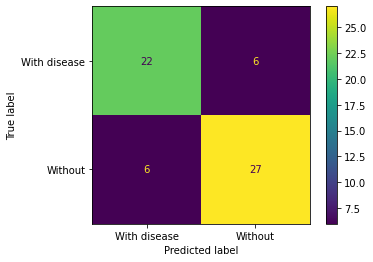

In [23]:
xgs1 = XGBClassifier(booster='gbtree',  n_estimators=1, gamma = 0.01, learning_rate = 0.01, reg_lambda = 10,
                     objective='binary:logistic')

xgs1.fit(X_train, Y_train)
y_pred3 = xgs1.predict(X_test)
print('Accuracy of XGS: {}'. format(accuracy_score(Y_test, y_pred3)))
plot_confusion_matrix(xgs1, X_test, Y_test, display_labels = ['With disease', 'Without'], values_format = 'd' )